# CAB420, Clustering, Example 1: K-Means Clustering
Dr Simon Denman (s.denman@qut.edu.au)

## Overview
In this example we'll look at k-means clustering. This will break a dataset into N clusters, where we have to specify N.

## Too Long; Didn't Read:
* K-means will cluster data given a desired number of clusters
* Initial cluster centres are selected randomly, and the clustering process then iterates for either a fixed number of steps, or until convergence. 
* Given the random initialisation, different runs of k-means will produce different results. If you initialise the random number generator before starting you can ensure repeatability.
* K-means will build spherical clusters, and clusters cannot overlap.
* With K-means, a point either belongs to a cluster, or doesn't (i.e. hard assignment).

In [1]:
import numpy
# for repeatability
numpy.random.SeedSequence(4)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math

## Random Data
To start we're going to create some data. We'll create two noisy clusters and try split them. Note that I've ensured that these clustes overlap a bit, to make it very slightly difficult for the clustering.

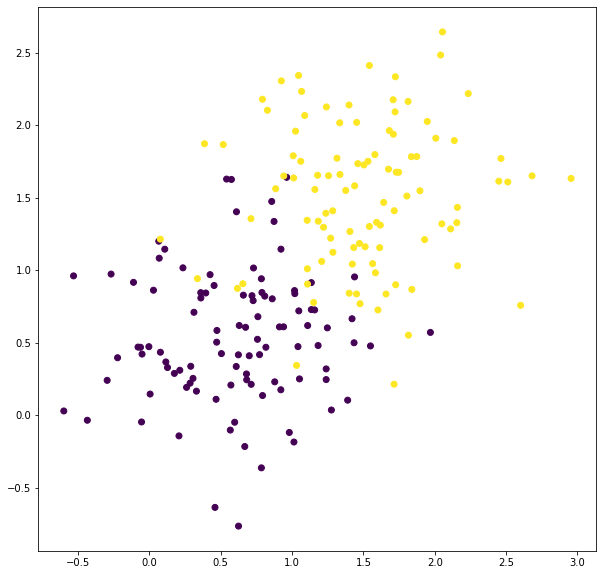

In [2]:
c1 = numpy.random.normal(0.5, 0.5, (100, 2))
c2 = numpy.random.normal(0.5, 0.5, (100, 2))
c2[:,0] = c2[:,0]+1
c2[:,1] = c2[:,1]+1

X = numpy.concatenate([c1, c2])
Y = numpy.zeros((200))
Y[100:] = 1

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:,0], X[:,1], c=Y);

## K-Means

Let's start with 2 clusters. Note that we also set the random state - we don't need to do this, but KMeans does use a random process, and so doing this enables us to get repeatable results. As we'll see later, when we don't do this we get different results each time through.

In [3]:
kmeans = KMeans(n_clusters=2, random_state=4).fit(X)

The two main things we get from K-Means are:
* the cluster assignments for each point
* the cluster centres

In [4]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
[[1.50223978 1.55688941]
 [0.5855749  0.48056966]]


Visualising what we have above, we get this:

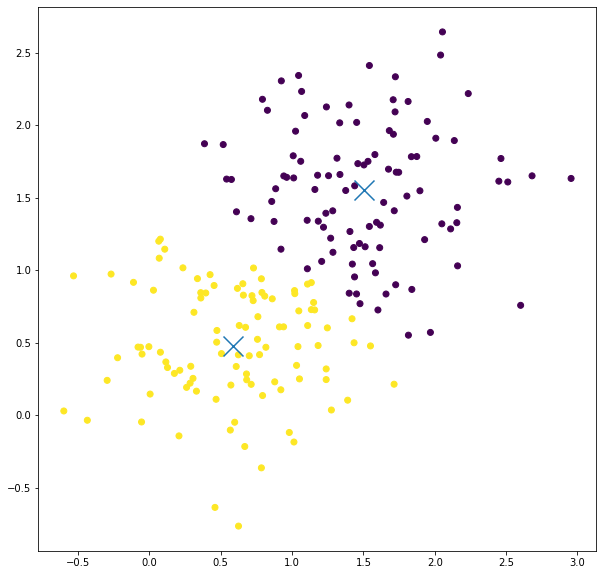

In [5]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_);
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=400)

We've got two clusters. The cluster centres are (roughly) where we'd expect them, but as we could have expected, points at the edge of the clusters have been confused.

If we have a look at multiple runs with different random seeds, we can see some variation in results:

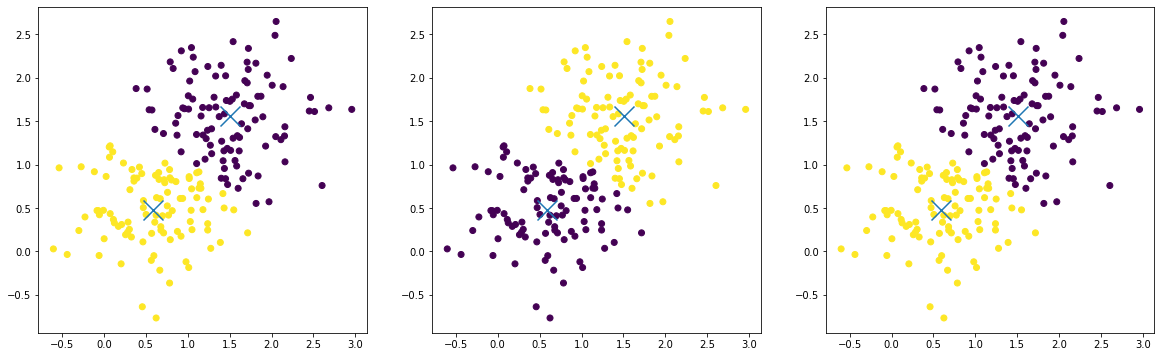

In [6]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 3, 1)
kmeans = KMeans(n_clusters=2, random_state=4).fit(X)
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_);
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=400)

kmeans = KMeans(n_clusters=2, random_state=44444).fit(X)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_);
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=400)

kmeans = KMeans(n_clusters=2, random_state=44444444).fit(X)
ax = fig.add_subplot(1, 3, 3)
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_);
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=400)

Looking at these we see:
* The first and second look pretty similar, but the cluster IDs have been swapped (i.e. what was cluster 2 is now cluster 1)
* For the second and third, some points at the boundary have been assigned differently, due to slightly different initial cluster centres

One of these results is not necessarily better or more accurate than another, the nature of KMeans is that it simply works out differently for different passes.

Let's try this with some stranger data now. In this data we have two very clear and well separated clusters.

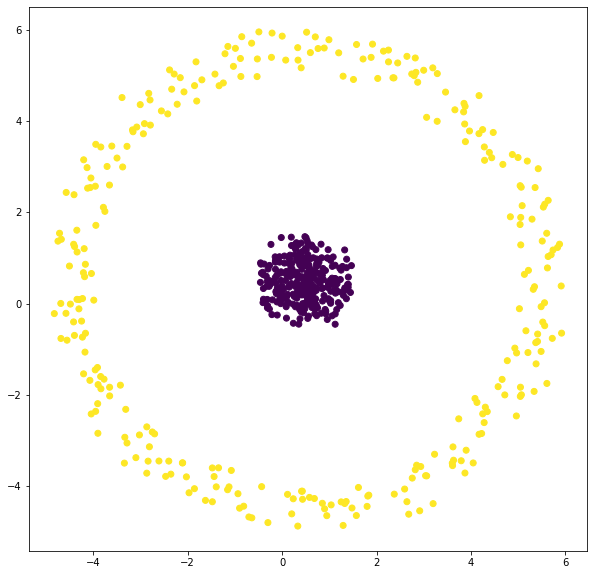

In [7]:
theta = numpy.arange(0, math.pi*2, math.pi*2/300)
theta = numpy.array([numpy.cos(theta), numpy.sin(theta)]).transpose()

c1 = 0.5*theta + numpy.random.random((300,2))
c2 = 5*theta + numpy.random.random((300,2))

X = numpy.concatenate([c1, c2])
Y = numpy.zeros((600))
Y[300:] = 1

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:,0], X[:,1], c=Y);

Let's run multiple clustering attempts, with different values of N, over this data and see what happens.

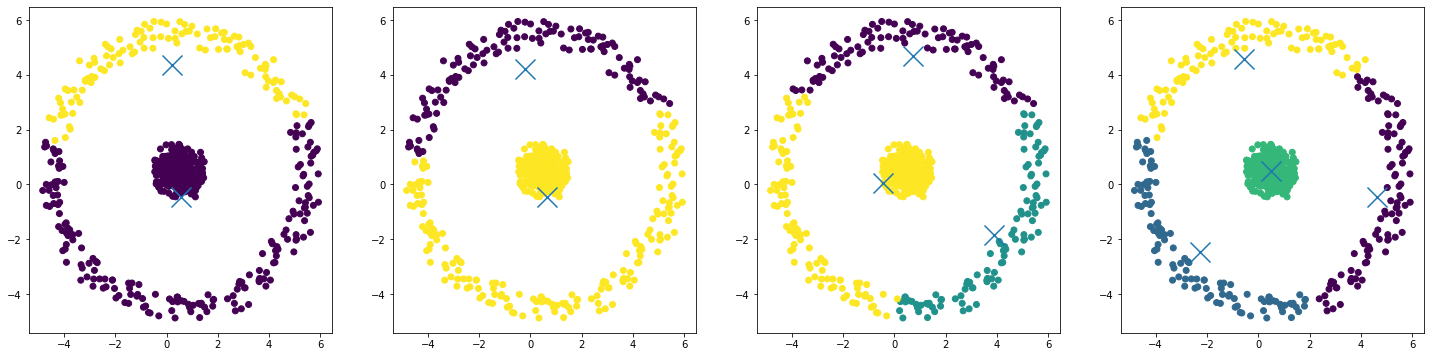

In [8]:
fig = plt.figure(figsize=[25, 6])
ax = fig.add_subplot(1, 4, 1)
kmeans = KMeans(n_clusters=2, random_state=4).fit(X)
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_);
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=400)

kmeans = KMeans(n_clusters=2, random_state=44444).fit(X)
ax = fig.add_subplot(1, 4, 2)
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_);
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=400)

kmeans = KMeans(n_clusters=3, random_state=4).fit(X)
ax = fig.add_subplot(1, 4, 3)
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_);
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=400)

kmeans = KMeans(n_clusters=4, random_state=4).fit(X)
ax = fig.add_subplot(1, 4, 4)
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_);
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=400)

What we get is:
* For none of these do we get the two actual clusters
* The first two are (more or less) flipped version of each other, this is just the random variation at play
* As we increase the number of clusters, we can separate the centre from the rest, but we just end up breaking our outer cluster into smaller and smaller pieces.

This behaviour is a result of some of the underlying properties of KMeans:
* clusters are circular
* clusters cannot overlap

The only way around these limitations, is to use another method.